In [ ]:
!pip install tensorflow_data_validation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.9/99.9 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.5/173.5 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of tensorflow-serving-api to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of grpcio-status to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple v

In [ ]:
!pip install fastparquet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 27.0 MB/s eta 0:00:00


# **Understanding the Attributes**


- **VendorID**: A code indicating the TPEP provider that provided the record.
  - 1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.
  
- **tpep_pickup_datetime**: The date and time when the meter was engaged.

- **tpep_dropoff_datetime**: The date and time when the meter was disengaged.

- **Passenger_count**: The number of passengers in the vehicle. This is a driver-entered value.

- **Trip_distance**: The elapsed trip distance in miles reported by the taximeter.

- **PULocationID**: TLC Taxi Zone in which the taximeter was engaged.

- **DOLocationID**: TLC Taxi Zone in which the taximeter was disengaged.

- **RateCodeID**: The final rate code in effect at the end of the trip.
  - 1= Standard rate
  - 2=JFK
  - 3=Newark
  - 4=Nassau or Westchester
  - 5=Negotiated fare
  - 6=Group ride

- **Store_and_fwd_flag**: This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.
  - Y= store and forward trip
  - N= not a store and forward trip

- **Payment_type**: A numeric code signifying how the passenger paid for the trip.
  - 1= Credit card
  - 2= Cash
  - 3= No charge
  - 4= Dispute
  - 5= Unknown
  - 6= Voided trip

- **Fare_amount**: The time-and-distance fare calculated by the meter.

- **Extra**: Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges.

- **MTA_tax**: $0.50 MTA tax that is automatically triggered based on the metered rate in use.

- **Improvement_surcharge**: $0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.

- **Tip_amount**: Tip amount – This field is automatically populated for credit card tips. Cash tips are not included.

- **Tolls_amount**: Total amount of all tolls paid in trip.

- **Total_amount**: The total amount charged to passengers. Does not include cash tips.

- **Congestion_Surcharge**: Total amount collected in trip for NYS congestion surcharge.

- **Airport_fee**: $1.25 for pick up only at LaGuardia and John F. Kennedy Airports.

# **1) Prep the data to be ready to be fed to a model.**

Look for missing, null, NaN records.


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import tensorflow_data_validation as tfdv
import apache_beam as beam

# Load the data
# df = pd.read_parquet('yellow_tripdata_2024-01.parquet', engine='fastparquet')
df = pd.read_csv('/content/drive/MyDrive/AnalyticsCAPSTONEDataset/2024/yellow_tripdata_2024-01.csv')

# Display basic information about the dataset
print(df.info())

<ipython-input-3-727896304e8c>:9: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/AnalyticsCAPSTONEDataset/2024/yellow_tripdata_2024-01.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2964624 entries, 0 to 2964623
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               int64  
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   RatecodeID             float64
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           int64  
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
 18  congestion_surcharge   float64
 19  Airport_fee            float64
dtypes: float64(12), int64(5), object(3)
memory usage: 452.4+ MB
None


In [ ]:
print(df.head())

   Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0           0         2  2024-01-01 00:57:55   2024-01-01 01:17:43   
1           1         1  2024-01-01 00:03:00   2024-01-01 00:09:36   
2           2         1  2024-01-01 00:17:06   2024-01-01 00:35:01   
3           3         1  2024-01-01 00:36:38   2024-01-01 00:44:56   
4           4         1  2024-01-01 00:46:51   2024-01-01 00:52:57   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              1.0           1.72         1.0                  N   
1              1.0           1.80         1.0                  N   
2              1.0           4.70         1.0                  N   
3              1.0           1.40         1.0                  N   
4              1.0           0.80         1.0                  N   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
0           186            79             2         17.7    1.0      0.5   
1           140   

In [ ]:
# Handle missing, null, and NaN records
null_counts = df.isnull().sum()
print("Null Value Counts:")
print(null_counts)

# Identify and handle outliers

Null Value Counts:
Unnamed: 0                    0
VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          140162
trip_distance                 0
RatecodeID               140162
store_and_fwd_flag       140162
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     140162
Airport_fee              140162
dtype: int64


Find outliers.

In [ ]:
# Method 1: Z-score method
from scipy import stats

# Calculate Z-score for each numeric column
z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))

# Define threshold for identifying outliers
threshold = 3

# Identify outliers
outlier_indices = np.where(z_scores > threshold)

# Print indices of outliers
print("Indices of outliers (Z-score method):")
print(list(zip(outlier_indices[0], outlier_indices[1])))

# Method 2: Interquartile Range (IQR) method
# Calculate Q1 and Q3
# Identify numeric columns excluding datetime columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate Q1 and Q3 for numeric columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)

# Calculate IQR for numeric columns
IQR = Q3 - Q1

# Define threshold for identifying outliers
threshold = 1.5

# Identify outliers for numeric columns
outliers = (df[numeric_cols] < (Q1 - threshold * IQR)) | (df[numeric_cols] > (Q3 + threshold * IQR))

# Print indices of outliers
print("Indices of outliers (IQR method):")
print(outliers.any(axis=1))

Indices of outliers (Z-score method):
[(12, 12), (24, 8), (24, 10), (24, 12), (24, 14), (32, 12), (38, 7), (55, 12), (62, 12), (75, 12), (95, 12), (98, 8), (99, 7), (99, 10), (99, 13), (100, 7), (137, 12), (177, 8), (177, 14), (205, 12), (229, 11), (229, 12), (229, 14), (247, 12), (251, 12), (255, 11), (325, 11), (325, 12), (325, 14), (333, 8), (333, 10), (333, 12), (344, 9), (349, 12), (359, 12), (376, 12), (423, 11), (464, 11), (464, 12), (493, 12), (504, 7), (506, 10), (506, 13), (507, 10), (536, 7), (536, 10), (536, 13), (537, 7), (552, 10), (552, 13), (580, 10), (591, 8), (591, 11), (591, 12), (591, 14), (593, 10), (620, 12), (630, 12), (668, 7), (672, 12), (678, 11), (678, 12), (678, 14), (682, 7), (682, 8), (682, 10), (682, 13), (682, 14), (683, 7), (709, 8), (709, 10), (709, 11), (709, 14), (734, 11), (734, 12), (734, 14), (740, 11), (770, 11), (770, 12), (770, 14), (817, 11), (844, 11), (844, 12), (854, 7), (854, 10), (854, 13), (891, 9), (936, 8), (936, 11), (998, 12), (999, 


Transform data – all entries should be numeric.

In [ ]:
# Transform data to numeric
# Numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Numeric Columns:")
print(numeric_cols)

# Categorical columns
categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()
print("Categorical Columns:")
print(categorical_cols)

Numeric Columns:
['Unnamed: 0', 'VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']
Categorical Columns:
['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag']


# **List all types of data, numeric, categorical, …**

In [ ]:
df.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
Airport_fee              float64
dtype: object

In [ ]:
#categorizing numeric and categorical data types
print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Numeric columns: ['Unnamed: 0', 'VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']
Categorical columns: ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag']


In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x if abs(x) < 1000000 else '%.2f*10^%d' % (x / 10**6, 6))

# Calculate summary statistics with the updated display options
summary_stats = df.describe()

# Print summary statistics
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
       Unnamed: 0  VendorID  passenger_count  trip_distance  RatecodeID  \
count   2.96*10^6 2.96*10^6        2.82*10^6      2.96*10^6   2.82*10^6   
mean    1.48*10^6      1.75             1.34           3.65        2.07   
std     855813.38      0.43             0.85         225.46        9.82   
min          0.00      1.00             0.00           0.00        1.00   
25%     741155.75      2.00             1.00           1.00        1.00   
50%     1.48*10^6      2.00             1.00           1.68        1.00   
75%     2.22*10^6      2.00             1.00           3.11        1.00   
max     2.96*10^6      6.00             9.00      312722.30       99.00   

       PULocationID  DOLocationID  payment_type  fare_amount     extra  \
count     2.96*10^6     2.96*10^6     2.96*10^6    2.96*10^6 2.96*10^6   
mean         166.02        165.12          1.16        18.18      1.45   
std           63.62         69.32          0.58        18.95      1.80   
min     

# **3)	Perform EDA on data. Utilize both:**
a.	Classic approach in EDA (Pandas, Numpy libraries)


In [ ]:
import matplotlib.pyplot as plt

df['pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()
df['pickup_day_no']=df['pickup_datetime'].dt.weekday
df['dropoff_day_no']=df['dropoff_datetime'].dt.weekday
df['pickup_hour']=df['pickup_datetime'].dt.hour
df['dropoff_hour']=df['dropoff_datetime'].dt.hour
df['pickup_month']=df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month

def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

df['pickup_timeofday'] = df['pickup_hour'].apply(time_of_day)
df['dropoff_timeofday'] = df['dropoff_hour'].apply(time_of_day)

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Calculate trip duration
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60  # Convert to minutes

b.	The TFDV (TensorFlow Data Validation) module with the powerful graphical statistics generated (Apache beam library…)


In [ ]:
import tensorflow_data_validation as tfdv
import apache_beam as beam

# Convert DataFrame to TFDV Dataset
data_stats = tfdv.generate_statistics_from_dataframe(df)

# Visualize statistics using TFDV's visualization utilities
tfdv.visualize_statistics(data_stats)

# Generate and visualize schema
schema = tfdv.infer_schema(data_stats)
tfdv.display_schema(schema)


Type  Presence Valency                Domain
Feature name                                                           
'Unnamed: 0'                INT  required                             -
'VendorID'                  INT  required                             -
'passenger_count'         FLOAT  optional  single                     -
'trip_distance'           FLOAT  required                             -
'RatecodeID'              FLOAT  optional  single                     -
'store_and_fwd_flag'     STRING  optional  single  'store_and_fwd_flag'
'PULocationID'              INT  required                             -
'DOLocationID'              INT  required                             -
'payment_type'              INT  required                             -
'fare_amount'             FLOAT  required                             -
'extra'                   FLOAT  required                             -
'mta_tax'                 FLOAT  required                             -
'tip_amount'              FLOAT  required                             -
'tolls_amount'            FLOAT  required                             -
'improvement_surcharge'   FLOAT  required                             -
'total_amount'            FLOAT  required                             -
'congestion_surcharge'    FLOAT  optional  single                     -
'Airport_fee'             FLOAT  optional  single                     -
'pickup_day'             STRING  required                  'pickup_day'
'dropoff_day'            STRING  required                 'dropoff_day'
'pickup_day_no'             INT  required                             -
'dropoff_day_no'            INT  required                             -
'pickup_hour'               INT  required                             -
'dropoff_hour'              INT  required                             -
'pickup_month'              INT  required                             -
'dropoff_month'             INT  required                             -
'pickup_timeofday'       STRING  required            'pickup_timeofday'
'dropoff_timeofday'      STRING  required           'dropoff_timeofday'
'trip_duration'           FLOAT  required                             -

Values
Domain                                                                                            
'store_and_fwd_flag'                                                                      'N', 'Y'
'pickup_day'          'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'
'dropoff_day'         'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'
'pickup_timeofday'                                 'Afternoon', 'Evening', 'Late night', 'Morning'
'dropoff_timeofday'                                'Afternoon', 'Evening', 'Late night', 'Morning'

Present dependencies and correlations among the various features in the data. List the most variables (Feature Importance) that will affect the target label.


In [ ]:
import seaborn as sns


<ipython-input-15-2226fdd578be>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


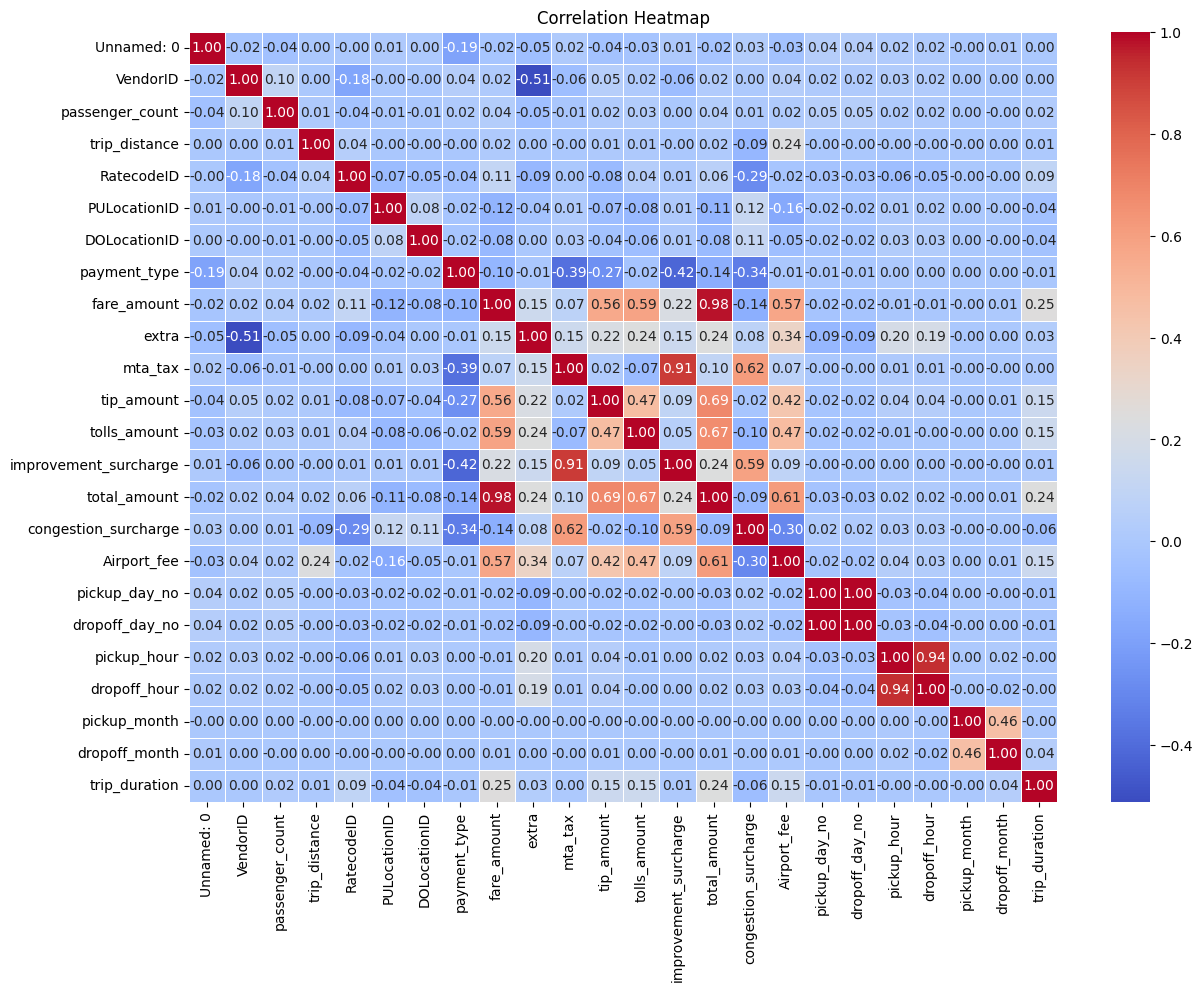

In [ ]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))  # Increase figsize for larger heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

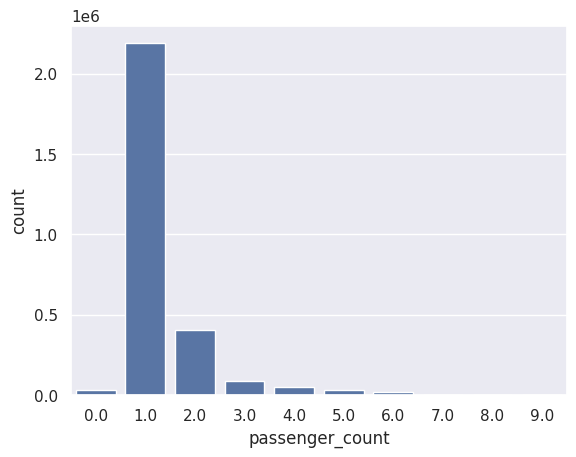

In [ ]:
#data visualisation
import seaborn as sns
sns.set()

sns.countplot(x='passenger_count',data=df)
df=df[df['passenger_count']!=0]
df=df[df['passenger_count']<=6]

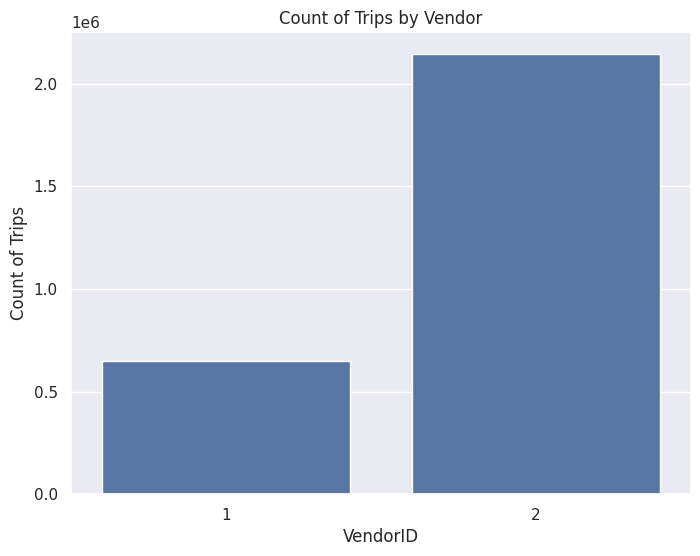

In [ ]:
# Plot count of trips by VendorID
plt.figure(figsize=(8, 6))
sns.countplot(x='VendorID', data=df)
plt.title('Count of Trips by Vendor')
plt.xlabel('VendorID')
plt.ylabel('Count of Trips')
plt.show()

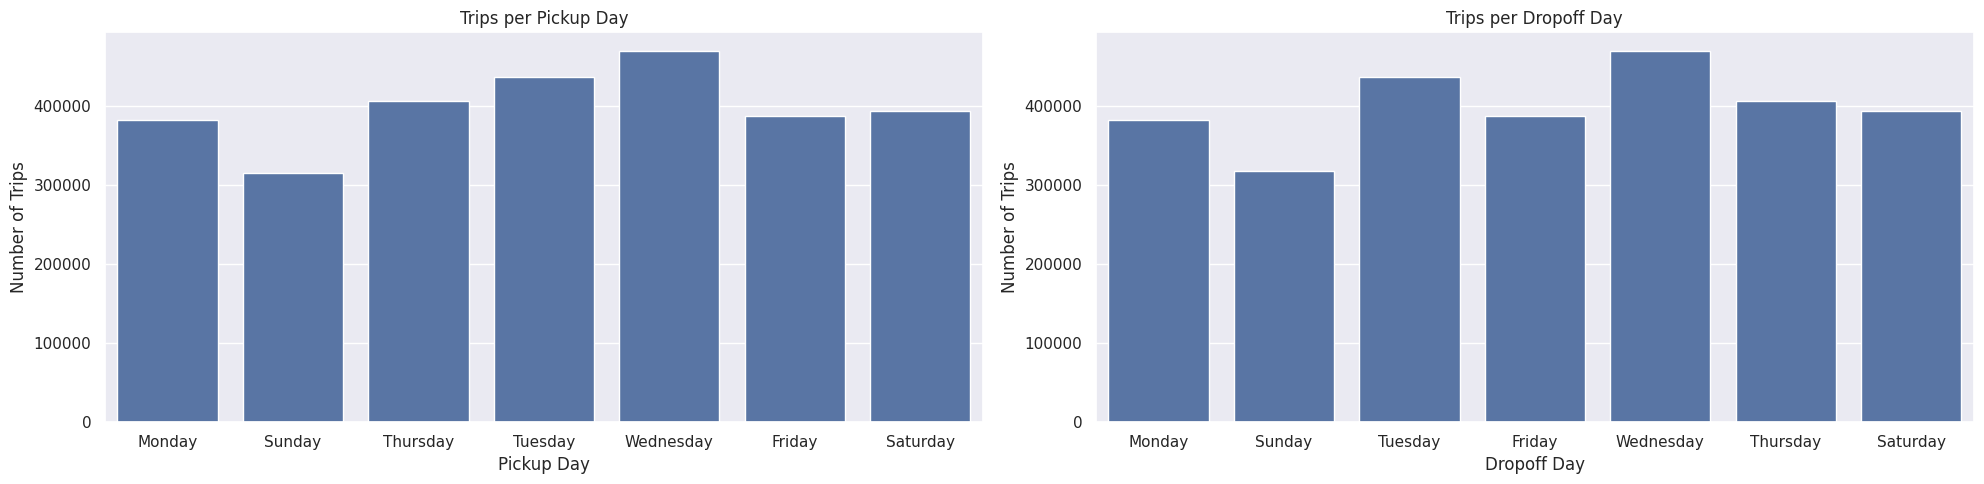

In [ ]:
# Trips per Day
figure, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))

# Plot pickup days
ax1.set_title('Trips per Pickup Day')
ax = sns.countplot(x="pickup_day", data=df, ax=ax1)
ax.set_xlabel('Pickup Day')
ax.set_ylabel('Number of Trips')

# Plot dropoff days
ax2.set_title('Trips per Dropoff Day')
ax = sns.countplot(x="dropoff_day", data=df, ax=ax2)
ax.set_xlabel('Dropoff Day')
ax.set_ylabel('Number of Trips')

plt.tight_layout()
plt.show()


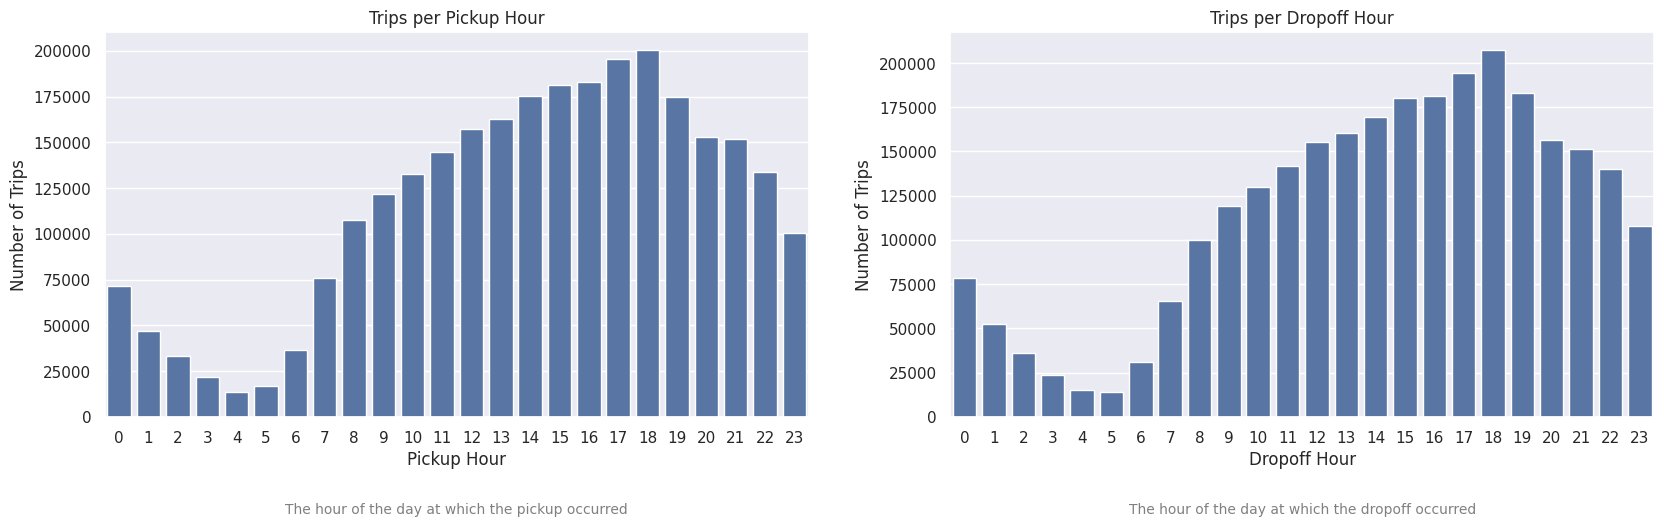

In [ ]:
# Trips per Hour
figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))
ax9.set_title('Trips per Pickup Hour')
ax=sns.countplot(x="pickup_hour",data=df,ax=ax9)
ax.set_xlabel('Pickup Hour')
ax.set_ylabel('Number of Trips')

ax10.set_title('Trips per Dropoff Hour')
ax=sns.countplot(x="dropoff_hour",data=df,ax=ax10)
ax.set_xlabel('Dropoff Hour')
ax.set_ylabel('Number of Trips')

# Adding attribute descriptions
ax9.annotate('The hour of the day at which the pickup occurred', xy=(0.5, -0.25), xycoords='axes fraction', ha='center', fontsize=10, color='gray')
ax10.annotate('The hour of the day at which the dropoff occurred', xy=(0.5, -0.25), xycoords='axes fraction', ha='center', fontsize=10, color='gray')

plt.show()


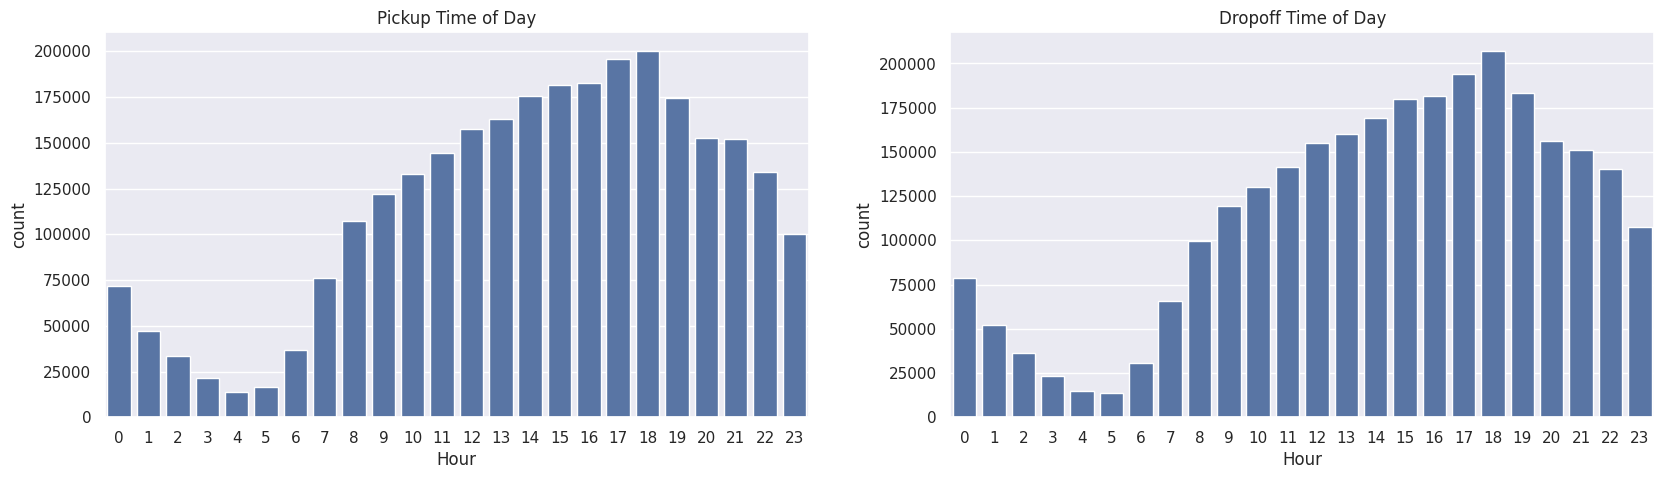

In [ ]:
# Create subplots with two columns
fig, (ax3, ax4) = plt.subplots(ncols=2, figsize=(20, 5))

# Set title for the first subplot
ax3.set_title('Pickup Time of Day')
# Plot count of pickups per time of day
sns.countplot(x=df['tpep_pickup_datetime'].dt.hour, ax=ax3)

# Set title for the second subplot
ax4.set_title('Dropoff Time of Day')
# Plot count of dropoffs per time of day
sns.countplot(x=df['tpep_dropoff_datetime'].dt.hour, ax=ax4)

# Set labels and format for the x-axis
ax3.set_xlabel('Hour')
ax3.set_xticks(range(24))
ax4.set_xlabel('Hour')
ax4.set_xticks(range(24))

# Display the plot
plt.show()


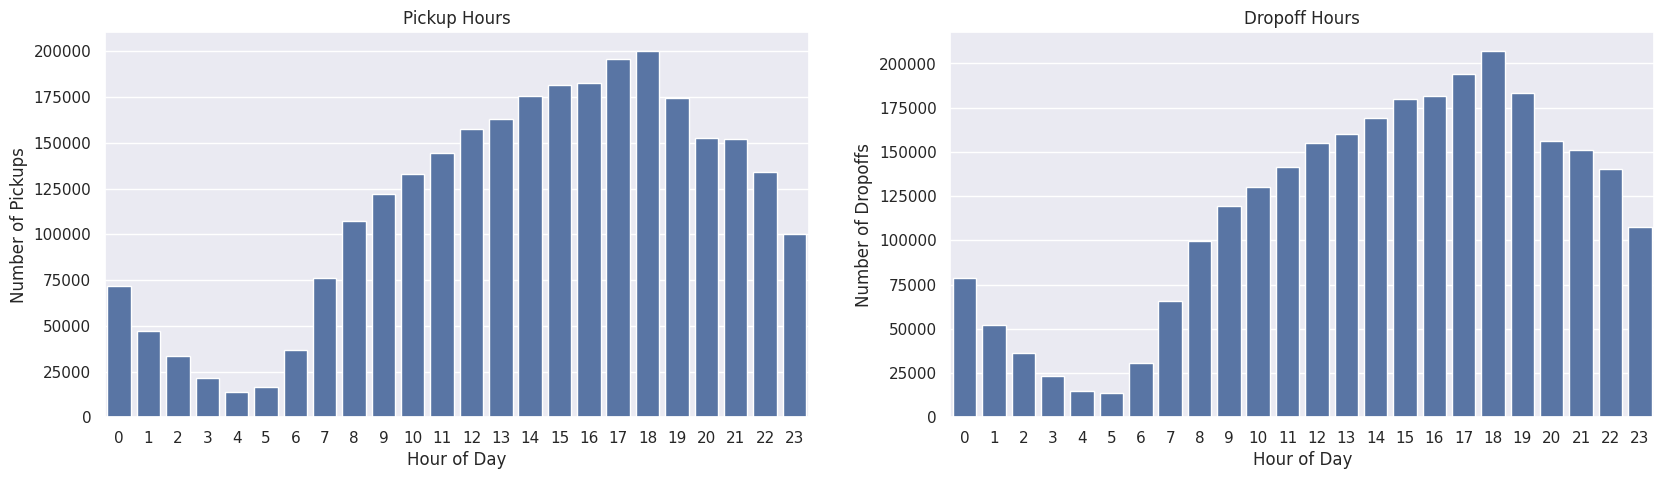

In [ ]:
# Create subplots with two columns
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))

# Set title for the first subplot
ax1.set_title('Pickup Hours')
# Plot count of pickups per hour
sns.countplot(x=df['tpep_pickup_datetime'].dt.hour, ax=ax1)

# Set labels for the first subplot
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Number of Pickups')

# Set title for the second subplot
ax2.set_title('Dropoff Hours')
# Plot count of dropoffs per hour
sns.countplot(x=df['tpep_dropoff_datetime'].dt.hour, ax=ax2)

# Set labels for the second subplot
ax2.set_xlabel('Hour of Day')
ax2.set_ylabel('Number of Dropoffs')

# Display the plot
plt.show()


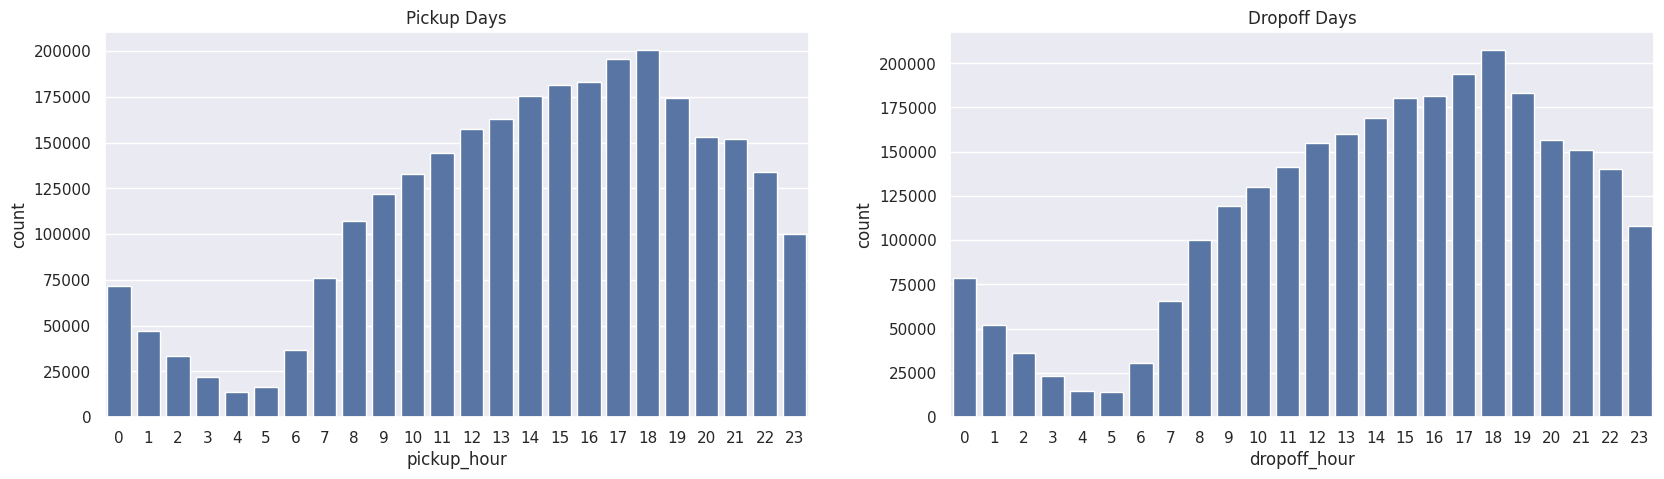

In [ ]:
figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))
ax9.set_title('Pickup Days')
ax=sns.countplot(x="pickup_hour",data=df,ax=ax9)
ax10.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_hour",data=df,ax=ax10)

<ipython-input-23-40430c781b0f>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='pickup_timeofday', y='trip_duration', data=df, ci=None)


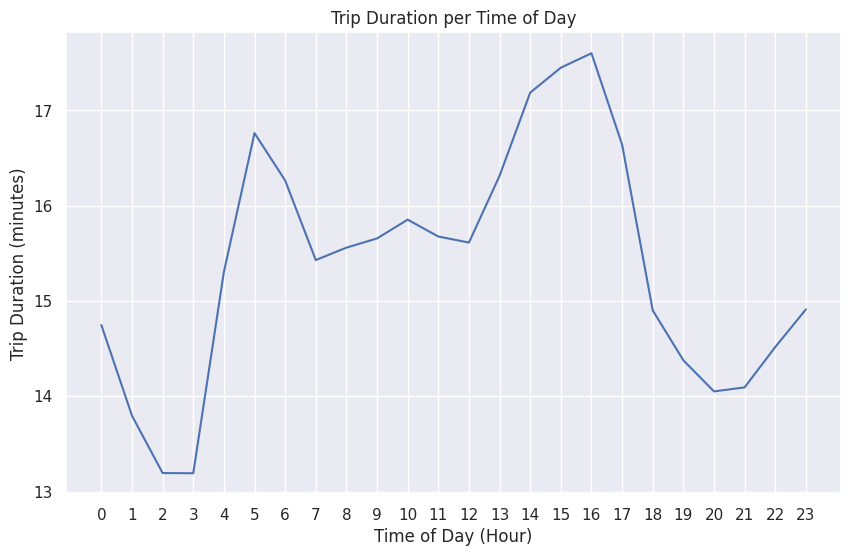

In [ ]:
# Convert pickup datetime to datetime object
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract time of day from pickup datetime
df['pickup_timeofday'] = df['tpep_pickup_datetime'].dt.hour

# Plot trip duration per time of day
plt.figure(figsize=(10, 6))
sns.lineplot(x='pickup_timeofday', y='trip_duration', data=df, ci=None)
plt.xlabel('Time of Day (Hour)')
plt.ylabel('Trip Duration (minutes)')
plt.title('Trip Duration per Time of Day')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# **Comparison Between January and February**

<ipython-input-25-42e87a099da2>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_january = pd.read_csv('/content/drive/MyDrive/AnalyticsCAPSTONEDataset/2024/yellow_tripdata_2024-01.csv')
<ipython-input-25-42e87a099da2>:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_march = pd.read_csv('/content/drive/MyDrive/AnalyticsCAPSTONEDataset/2024/yellow_tripdata_2024-03.csv')


Number of trips in January: 2964624
Number of trips in March: 3582628
Average trip duration in January: 15.612950619257845
Average trip duration in March: 16.6726711881148


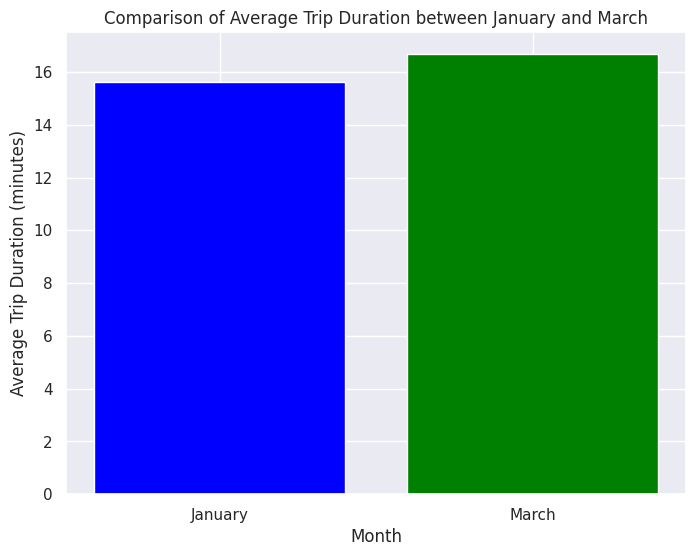

In [ ]:
# Load January data
# df_january = pd.read_parquet('yellow_tripdata_2020-01.parquet', engine='fastparquet')
df_january = pd.read_csv('/content/drive/MyDrive/AnalyticsCAPSTONEDataset/2024/yellow_tripdata_2024-01.csv')

# Load March data
# df_march = pd.read_parquet('yellow_tripdata_2020-03.parquet', engine='fastparquet')
df_march = pd.read_csv('/content/drive/MyDrive/AnalyticsCAPSTONEDataset/2024/yellow_tripdata_2024-03.csv')

# Calculate trip duration for January data
df_january['tpep_pickup_datetime'] = pd.to_datetime(df_january['tpep_pickup_datetime'])
df_january['tpep_dropoff_datetime'] = pd.to_datetime(df_january['tpep_dropoff_datetime'])
df_january['trip_duration'] = (df_january['tpep_dropoff_datetime'] - df_january['tpep_pickup_datetime']).dt.total_seconds() / 60

# Calculate trip duration for March data
df_march['tpep_pickup_datetime'] = pd.to_datetime(df_march['tpep_pickup_datetime'])
df_march['tpep_dropoff_datetime'] = pd.to_datetime(df_march['tpep_dropoff_datetime'])
df_march['trip_duration'] = (df_march['tpep_dropoff_datetime'] - df_march['tpep_pickup_datetime']).dt.total_seconds() / 60

# Compare number of trips in January and March
num_trips_january = len(df_january)
num_trips_march = len(df_march)

print("Number of trips in January:", num_trips_january)
print("Number of trips in March:", num_trips_march)

# Compare average trip duration in January and March
avg_trip_duration_january = df_january['trip_duration'].mean()
avg_trip_duration_march = df_march['trip_duration'].mean()

print("Average trip duration in January:", avg_trip_duration_january)
print("Average trip duration in March:", avg_trip_duration_march)

# Data
months = ['January', 'March']
avg_trip_duration = [avg_trip_duration_january, avg_trip_duration_march]

# Plot
plt.figure(figsize=(8, 6))
plt.bar(months, avg_trip_duration, color=['blue', 'green'])
plt.xlabel('Month')
plt.ylabel('Average Trip Duration (minutes)')
plt.title('Comparison of Average Trip Duration between January and March')
plt.show()

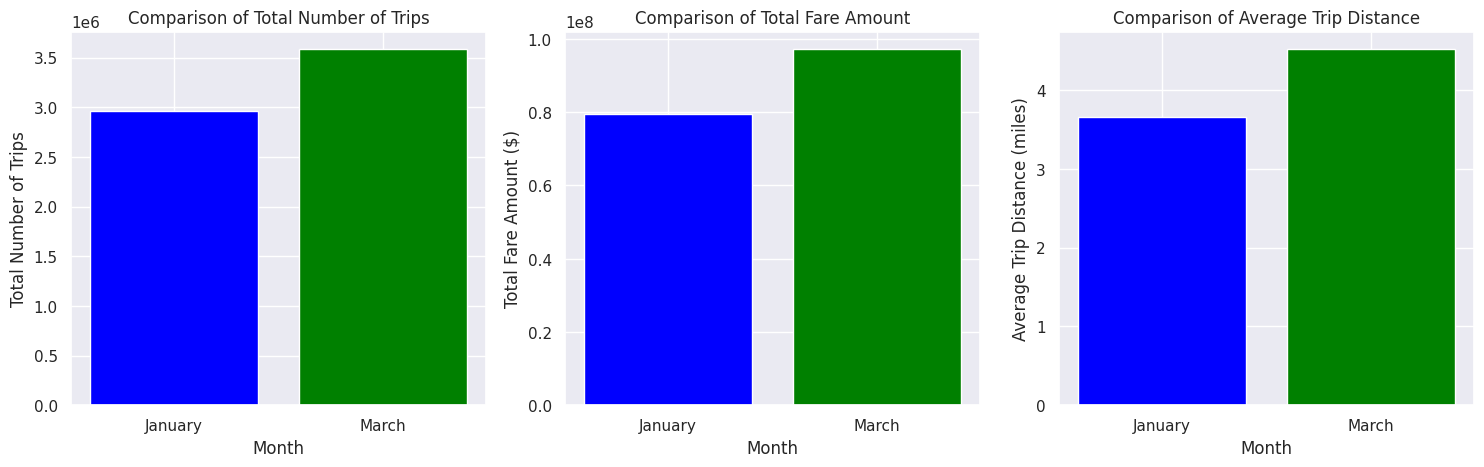

In [ ]:
# Calculate total number of trips for January and March
total_trips_january = len(df_january)
total_trips_march = len(df_march)

# Calculate total fare amount for January and March
total_fare_january = df_january['total_amount'].sum()
total_fare_march = df_march['total_amount'].sum()

# Calculate average trip distance for January and March
avg_trip_distance_january = df_january['trip_distance'].mean()
avg_trip_distance_march = df_march['trip_distance'].mean()

# Create comparison charts
plt.figure(figsize=(15, 5))

# Number of trips comparison
plt.subplot(1, 3, 1)
plt.bar(['January', 'March'], [total_trips_january, total_trips_march], color=['blue', 'green'])
plt.xlabel('Month')
plt.ylabel('Total Number of Trips')
plt.title('Comparison of Total Number of Trips')

# Total fare amount comparison
plt.subplot(1, 3, 2)
plt.bar(['January', 'March'], [total_fare_january, total_fare_march], color=['blue', 'green'])
plt.xlabel('Month')
plt.ylabel('Total Fare Amount ($)')
plt.title('Comparison of Total Fare Amount')

# Average trip distance comparison
plt.subplot(1, 3, 3)
plt.bar(['January', 'March'], [avg_trip_distance_january, avg_trip_distance_march], color=['blue', 'green'])
plt.xlabel('Month')
plt.ylabel('Average Trip Distance (miles)')
plt.title('Comparison of Average Trip Distance')

plt.tight_layout()
plt.show()
